In [72]:
from pathlib import Path
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Configure notebook and get raw data

In [59]:
data_path = Path("../data/MACH_data/data.cleaned.csv")
codebook_path = Path("../data/MACH_data/codebook.txt")
original_data_df = pd.read_csv(data_path)

# Choose features
Sticking to just the actual question response for now.

In [60]:
question_responses = ["Q1A", "Q2A", "Q3A", "Q4A", "Q5A", "Q6A", "Q7A", "Q8A", "Q9A", "Q10A", 
                      "Q11A", "Q12A", "Q13A", "Q14A", "Q15A", "Q16A", "Q17A", "Q18A", "Q19A", "Q20A"]
X = original_data_df[question_responses].copy()
print(f"Using features: {question_responses}  |  Shape: {X.shape}")
display(X.head())

Using features: ['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A', 'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A', 'Q20A']  |  Shape: (73489, 20)


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
0,3.0,3.0,5.0,2.0,3.0,1.0,2.0,4.0,3.0,3.0,1.0,5.0,4.0,1.0,5.0,2.0,4.0,4.0,4.0,4.0
1,5.0,5.0,1.0,3.0,5.0,1.0,1.0,4.0,2.0,1.0,1.0,5.0,5.0,2.0,5.0,1.0,2.0,4.0,5.0,3.0
2,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,1.0,1.0,5.0,5.0,3.0
3,2.0,4.0,2.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,1.0,5.0,1.0,1.0,4.0,1.0,1.0,5.0,3.0,4.0
4,5.0,5.0,2.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,1.0,4.0,4.0,1.0,5.0,1.0,1.0,4.0,5.0,1.0


# Data preprocessing
Scaling this data is likely not necessary since the data is usually between 1 and 5, with some NA values.

In [61]:
X_clean = X.dropna().copy()
X_clean[question_responses] = X_clean[question_responses].astype(int)
Xs = pd.DataFrame(X_clean, columns=question_responses, index=X_clean.index)
# use only 5000 random datapoints
Xs_sample = Xs.sample(n=5000, random_state=42)
print(f"After preprocessing shape: {Xs_sample.shape}")
display(Xs_sample.head())
display(Xs_sample.describe().T.round(3))

After preprocessing shape: (5000, 20)


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
5860,2,1,3,4,4,3,2,2,3,3,3,4,5,3,5,3,1,5,4,4
61638,4,1,1,1,1,1,1,1,5,4,1,5,1,4,5,1,5,1,5,2
33684,5,5,2,3,5,2,2,2,1,4,1,5,4,2,3,2,2,5,5,5
32572,2,4,3,4,2,3,4,2,3,5,1,5,2,1,2,2,1,4,5,4
2493,2,4,4,2,3,3,3,4,5,4,2,2,1,2,3,3,2,4,3,4


,count,mean,std,min,25%,50%,75%,max
Q1A,5000.0,3.318,1.516,1.0,2.0,4.0,5.0,5.0
Q2A,5000.0,3.312,1.473,1.0,2.0,4.0,5.0,5.0
Q3A,5000.0,2.800,1.432,1.0,2.0,3.0,4.0,5.0
Q4A,5000.0,2.766,1.416,1.0,1.0,3.0,4.0,5.0
Q5A,5000.0,3.626,1.346,1.0,3.0,4.0,5.0,5.0
Q6A,5000.0,2.597,1.482,1.0,1.0,2.0,4.0,5.0
Q7A,5000.0,2.148,1.358,1.0,1.0,2.0,3.0,5.0
Q8A,5000.0,3.130,1.481,1.0,2.0,4.0,4.0,5.0
Q9A,5000.0,3.769,1.404,1.0,3.0,4.0,5.0,5.0
Q10A,5000.0,3.135,1.501,1.0,2.0,3.0,5.0,5.0


# Elbow method to decide k

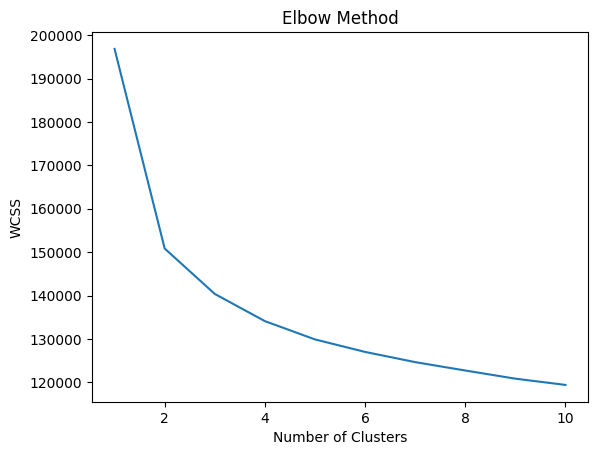

In [62]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(Xs_sample)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

It seems that k = 2 to 6 is the elbow point.

# Cluster

In [63]:
k_range = range(2, 7)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(Xs_sample)

    # get silhoutte score
    sil = silhouette_score(Xs_sample, clusters)
    print(f"Silhouette Score for k={k}: {sil}")

Silhouette Score for k=2: 0.20703409339322854
Silhouette Score for k=3: 0.12406769562727747
Silhouette Score for k=4: 0.12695184040719432
Silhouette Score for k=5: 0.0829715013015925
Silhouette Score for k=6: 0.08072961120515779


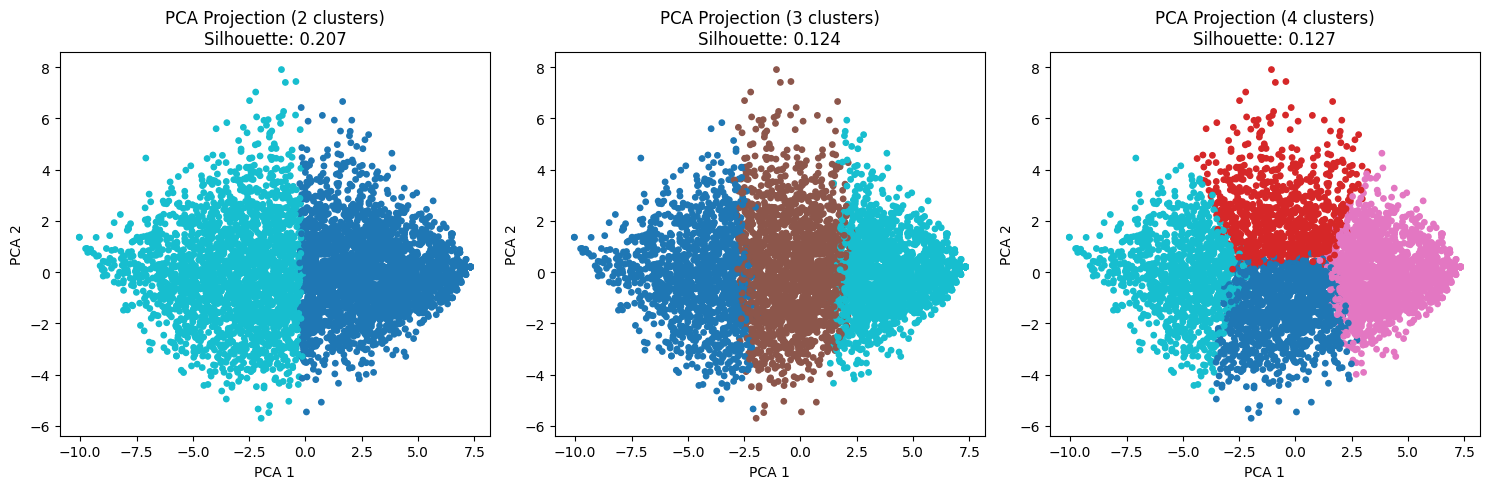

In [64]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xs_sample)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, k in enumerate([2, 3, 4]):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(Xs_sample)
    score = silhouette_score(Xs_sample, labels)
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", s=15)
    axes[i].set_title(f"PCA Projection ({k} clusters)\nSilhouette: {score:.3f}")
    axes[i].set_xlabel("PCA 1")
    axes[i].set_ylabel("PCA 2")
plt.tight_layout()
plt.show()

# Analyze cluster mean responses

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
Cluster,,,,,,,,,,,,,,,,,,,,
0,1.866171,2.044610,3.617844,3.810409,2.505576,3.893680,3.217844,2.064684,4.805204,4.266171,2.313755,2.415613,1.681041,2.886989,2.488476,3.483271,2.808922,2.429740,3.860223,1.605948
1,3.307283,3.304625,3.055821,2.902180,3.679957,2.685274,2.110579,3.076555,4.207337,3.399256,1.743753,3.792663,2.788410,2.120680,3.382775,2.537480,2.458799,3.691122,4.377990,2.256778
2,4.430101,4.281849,1.908681,1.830891,4.418264,1.520857,1.376550,3.994927,2.518602,1.996054,1.273393,4.573281,4.003382,1.478579,4.242954,1.770575,1.865276,4.329200,4.625705,3.219842


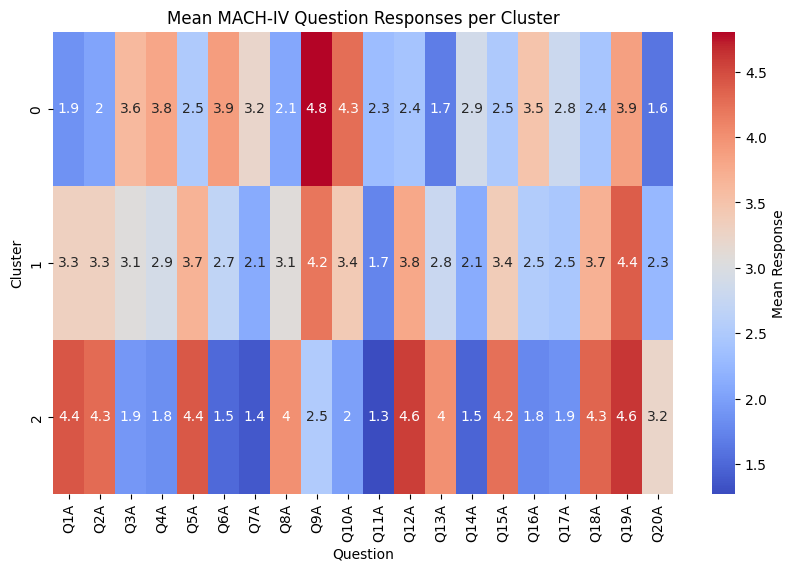

In [65]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(Xs_sample)
df = Xs_sample.copy()
df["Cluster"] = labels

cluster_means = df.groupby("Cluster").mean()
display(cluster_means)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm", cbar_kws={"label": "Mean Response"})
plt.title("Mean MACH-IV Question Responses per Cluster")
plt.xlabel("Question")
plt.ylabel("Cluster")
plt.show()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A
Cluster,,,,,,,,,,,,,,,,,,,,
0,1,1,5,4,1,5,2,1,5,5,1,1,1,3,1,5,1,1,5,1
1,4,4,2,4,4,2,1,4,5,4,1,5,1,1,4,1,1,4,5,1
2,5,5,1,1,5,1,1,5,1,1,1,5,5,1,5,1,1,5,5,5


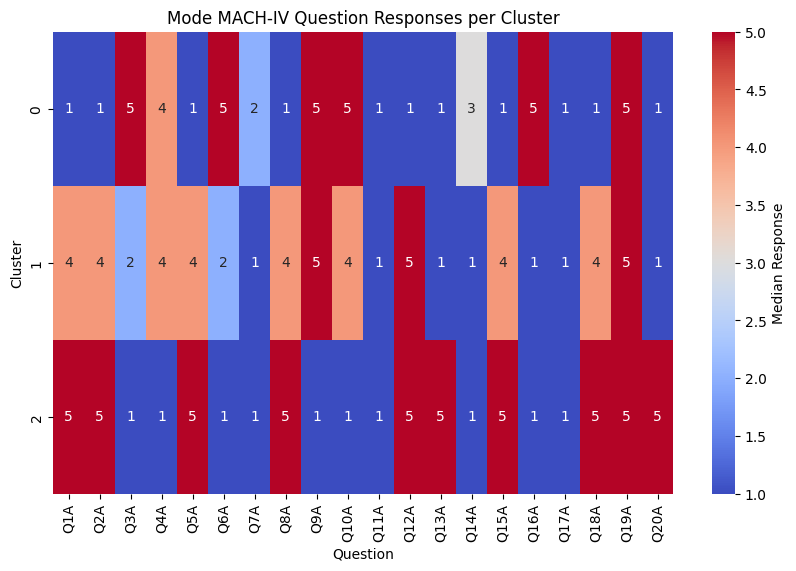

In [66]:
cluster_modes = df.groupby("Cluster")[question_responses] \
                  .agg(lambda x: x.mode().iloc[0]) # first mode
display(cluster_modes)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_modes, annot=True, cmap="coolwarm", cbar_kws={"label": "Median Response"})
plt.title("Mode MACH-IV Question Responses per Cluster")
plt.xlabel("Question")
plt.ylabel("Cluster")
plt.show()

# Check for patterns with other columns

In [69]:
other_responses = ["TIPI1","TIPI2","TIPI3","TIPI4","TIPI5","TIPI6","TIPI7","TIPI8","TIPI9","TIPI10",
                   "VCL1","VCL2","VCL3","VCL4","VCL5","VCL6","VCL7","VCL8","VCL9","VCL10", "VCL11","VCL12","VCL13","VCL14","VCL15", "VCL16",
                   "education", "urban", "gender", "engnat", "age", "hand", "religion", "orientation", "race", "voted", "married", "familysize", "major"]

# remove major for now
other_responses.remove("major")

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,0.615295,0.525332,0.773978,0.564418,0.823686,0.637069,0.831014,0.445566,0.701009,0.365587,...,0.535564,0.643494,0.000021,0.382652,0.407373,0.262007,0.752947,0.732714,0.512268,0.114033
0.5,0.572112,0.636591,0.725906,0.589428,0.800030,0.651173,0.739804,0.522291,0.653832,0.388699,...,0.495304,0.709729,0.000548,0.382243,0.378921,0.268900,0.707450,0.774056,0.439305,0.105817
1.0,0.548881,0.729103,0.717024,0.544049,0.801659,0.659688,0.576341,0.526413,0.675149,0.369464,...,0.441188,0.709696,0.000013,0.402856,0.347238,0.276325,0.712756,0.790023,0.408493,0.101747


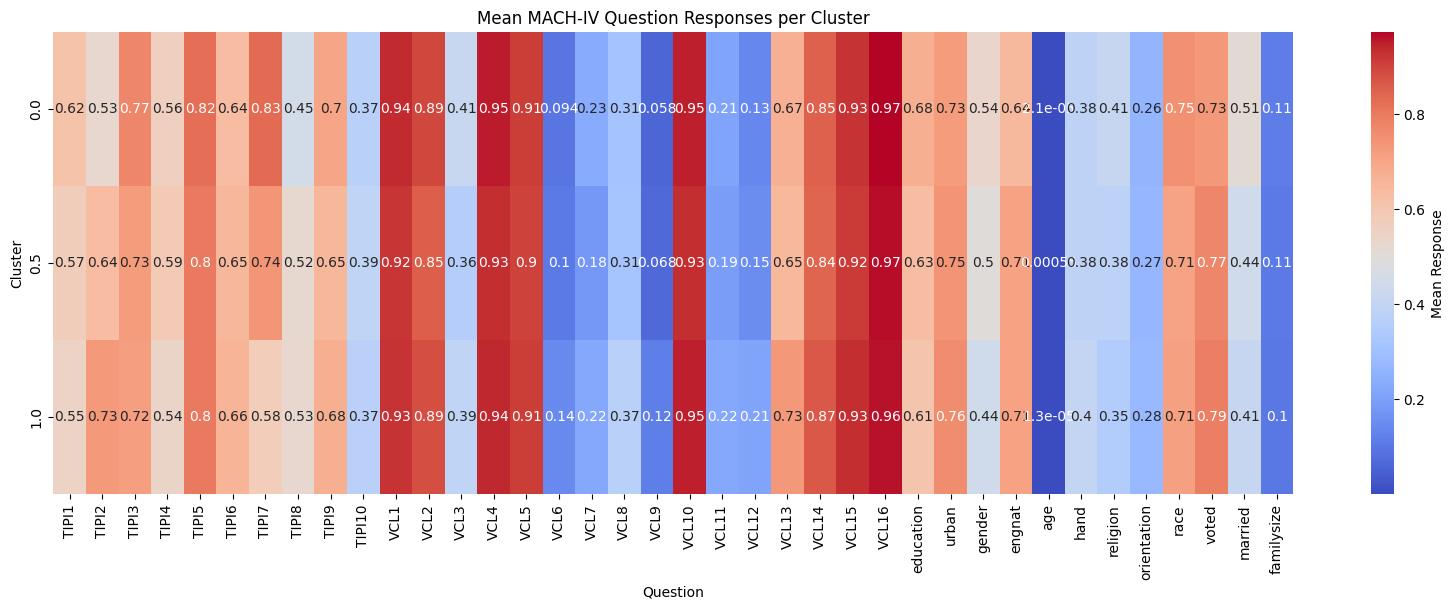

In [80]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(Xs_sample)
Xs_sample_with_other_responses = original_data_df.loc[Xs_sample.index]
df = pd.DataFrame(Xs_sample_with_other_responses, columns=other_responses, index=Xs_sample_with_other_responses.index)
df["Cluster"] = labels

scaler = MinMaxScaler()
normalized_df = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns,
    index=df.index
)

cluster_means = normalized_df.dropna().groupby("Cluster").mean()
display(cluster_means)

plt.figure(figsize=(20, 6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm", cbar_kws={"label": "Mean Response"})
plt.title("Mean MACH-IV Question Responses per Cluster")
plt.xlabel("Question")
plt.ylabel("Cluster")
plt.show()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,0.857143,0.714286,0.857143,0.714286,1.0,0.857143,1.000000,0.142857,0.857143,0.142857,...,0.666667,0.5,0.000008,0.333333,0.083333,0.2,0.857143,0.5,0.333333,0.083333
0.5,0.857143,0.714286,0.857143,0.714286,1.0,0.714286,0.857143,0.714286,0.857143,0.142857,...,0.333333,0.5,0.000005,0.333333,0.166667,0.2,0.857143,1.0,0.333333,0.083333
1.0,0.285714,0.857143,1.000000,0.142857,1.0,1.000000,0.714286,0.714286,1.000000,0.142857,...,0.333333,0.5,0.000005,0.333333,0.166667,0.2,0.857143,1.0,0.333333,0.083333


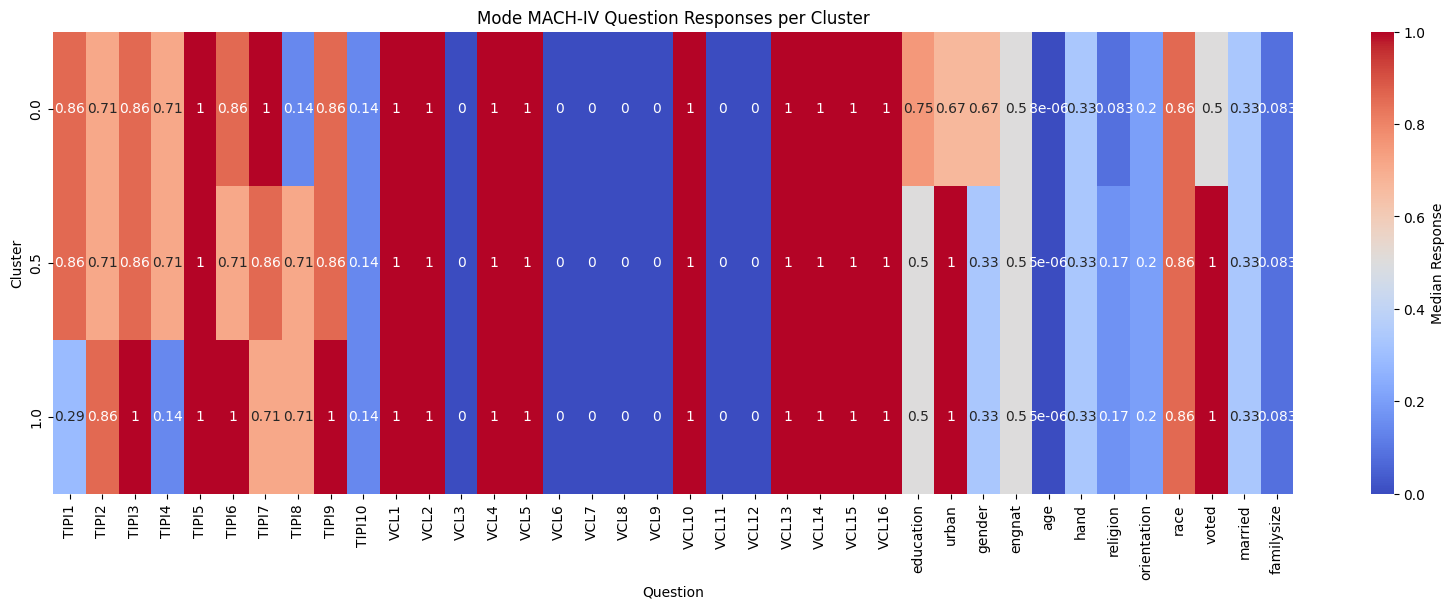

In [76]:
cluster_modes = normalized_df.groupby("Cluster")[other_responses] \
                  .agg(lambda x: x.mode().iloc[0]) # first mode
display(cluster_modes)

plt.figure(figsize=(20, 6))
sns.heatmap(cluster_modes, annot=True, cmap="coolwarm", cbar_kws={"label": "Median Response"})
plt.title("Mode MACH-IV Question Responses per Cluster")
plt.xlabel("Question")
plt.ylabel("Cluster")
plt.show()